# Importing Libraries
in this part we will install all the necessary libraries on command prompt and then import the necessary functions from those libraries. 

In [1]:
# importing all the necessary libraries
import pandas as pd

from numpy import mean
import numpy as np
import time

# step 1: preprocessing
from sklearn.impute import SimpleImputer # import some strategic imputer to fill in any missing values using mean
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer # scale all the values to one range to avoid any biasness (this bias is seen in mostly naive bayes and knn etc)

from sklearn.impute import KNNImputer # import some strategic imputer to fill missing values using KNN (finds the nearest neighbour and fills it with that value)

from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_classif, VarianceThreshold

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso

# step 2: data division
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV, ParameterGrid # to divide the code into train/test using a specific percentage or with/without replacement

# step 3: model
from sklearn.tree import DecisionTreeRegressor

# step 4: displaying accuracy
from sklearn.metrics import roc_auc_score, accuracy_score # to display the accuracy of our tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer

# step 5: warning filter
import warnings
warnings.filterwarnings('ignore')

# Data Loading
data shall be loaded into variables as data sets using pandas and csv readers. they will be checked to see if they are loaded properly and will be loaded as 2 sets: train and test as per given in the kaggle data

In [2]:
# lets load the training data set
train_data = pd.read_csv(r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger2\iml-fall-2024-challenge-2\train\train.csv")

# lets also check it by getting the first few rows of the data, there should be x1 - x78 and one target variable Y
train_data.head() 

,full_sq,life_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43.0,27.0,4.0,Investment,Bibirevo,6407578.100,155572.0,0.189727,0.000070,9576.0,...,9.0,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0
1,34.0,19.0,3.0,Investment,Nagatinskij Zaton,9589336.912,115352.0,0.372602,0.049637,6880.0,...,15.0,3.0,0.0,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0
2,43.0,29.0,2.0,Investment,Tekstil'shhiki,4808269.831,101708.0,0.112560,0.118537,5879.0,...,10.0,3.0,0.0,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0
3,77.0,77.0,4.0,Investment,Basmannoe,8398460.622,108171.0,0.015234,0.037316,5706.0,...,319.0,108.0,17.0,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0
4,67.0,46.0,14.0,Investment,Nizhegorodskoe,7506452.020,43795.0,0.007670,0.486246,2418.0,...,62.0,14.0,1.0,53.0,78.0,1.0,20.0,113.0,17.0,9100000.0


In [3]:
# lets load the test data
test_data = pd.read_csv(r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger2\iml-fall-2024-challenge-2\test\test.csv")

# check if the data has been loaded by getting the first 5 rows - there should be x1 - x78 and no target variable Y as this is test data
test_data.head() 

,row ID,full_sq,life_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,Row3,89.0,50.0,9.0,Investment,Mitino,1.258354e+07,178473.0,0.194703,0.069753,...,15.0,11.0,2.0,1.0,4.0,4.0,0.0,0.0,26.0,3.0
1,Row6,25.0,14.0,10.0,Investment,Sokol'niki,1.032047e+07,57405.0,0.523439,0.042307,...,144.0,81.0,16.0,3.0,38.0,80.0,1.0,27.0,127.0,8.0
2,Row11,38.0,19.0,11.0,Investment,Zapadnoe Degunino,7.632940e+06,78810.0,0.051844,0.437885,...,39.0,8.0,3.0,0.0,10.0,9.0,0.0,0.0,35.0,4.0
3,Row12,43.0,28.0,4.0,Investment,Kuncevo,5.235177e+07,142462.0,0.070662,0.035145,...,21.0,13.0,9.0,1.0,7.0,15.0,0.0,2.0,47.0,0.0
4,Row14,31.0,21.0,3.0,Investment,Lefortovo,8.993640e+06,89971.0,0.066941,0.306977,...,205.0,88.0,19.0,2.0,63.0,100.0,0.0,28.0,132.0,14.0


# Data Preprocessing
before we start processing this data and using algorithms, we will fix this data first, this is called data preprocessing

## split data into categorical and numerical
categorical will have one-hot and simple imputer of most frequent while numerical will have simple mean imputer and minmax scaler

In [4]:
categorical_cols = train_data.select_dtypes(include=["object"]).columns
numerical_cols = train_data.select_dtypes(exclude=["object"]).drop(columns=['price_doc']).columns

In [5]:
# num_transformer = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="median")),
#     ("scaler", MinMaxScaler())
# ])

# cat_transformer = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("onehot", OneHotEncoder(handle_unknown="ignore"))
# ])

In [6]:
# # Column transformer for preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", num_transformer, numerical_cols),
#         ("cat", cat_transformer, categorical_cols)
#     ]
# )

In [7]:
# train_data = preprocessor.fit_transform(train_data)
# print("train completed")
# test_data = preprocessor.transform(test_data)
# print("test data completed")

# imputer

In [8]:
num_imputer = SimpleImputer(strategy="mean")
train_data[numerical_cols] = num_imputer.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = num_imputer.transform(test_data[numerical_cols])

cat_imputer = SimpleImputer(strategy="most_frequent")
train_data[categorical_cols] = cat_imputer.fit_transform(train_data[categorical_cols])
test_data[categorical_cols] = cat_imputer.transform(test_data[categorical_cols])

# scaler

In [9]:
scaler = StandardScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

# one-hot

In [10]:
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)
# Align the test data with the training data columns
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

# test_data = test_data.drop(columns=['price_doc'], errors="ignore")

## correlation matrix
i tried getting the correlation matrix but apparently a 2000 columns matrix is very computationally expensive as it performs pairs for all. so dont run it. it takes too long and then fails. i ran for 5 minutes. 

In [11]:
# # DONT RUN
# corr_matrix = train_data.corr()
# print(corr_matrix)

# PCA
principal component analysis is applied

Cumulative explained variance:  [1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


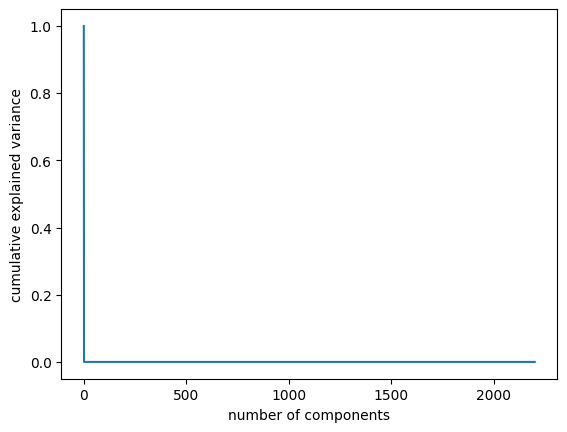

In [12]:
# plot an elbow graph to find the optimal number of components
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_data)  # Fit PCA to your dataset

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
pca.explained_variance_ratio_.round(3)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance: ", cumulative_variance)
print(cumulative_variance)

In [13]:
# Preserve the target variable
train_copy = train_data.copy()  # Backup original data
test_copy = test_data.copy()

# Separate target variable and features
train_features = train_data.drop(columns=['price_doc'])  # Features for PCA
train_target = train_data['price_doc']                  # Target variable

test_features = test_data.drop(columns=['price_doc'])    # Features for PCA

# Apply PCA transformation
pca = PCA(n_components=10)
train_features_pca = pca.fit_transform(train_features)  # Fit and transform train data
test_features_pca = pca.transform(test_features)        # Transform test data

# Reconstruct train_data and test_data with PCA-transformed features and target variable
train_data_transformed = pd.DataFrame(train_features_pca, columns=[f'PC{i+1}' for i in range(10)])
train_data_transformed['price_doc'] = train_target.reset_index(drop=True)

test_data_transformed = pd.DataFrame(test_features_pca, columns=[f'PC{i+1}' for i in range(10)])
test_data_transformed['price_doc'] = test_copy['price_doc'].reset_index(drop=True)

## Data Splitting - festures and targets
the data in train_data set is of x1 - x78 columns (79 variables) and one target variable (Y). we must split that data so that we can perform data preprocessing on the features variables (will be referred to as X).

In [14]:
# so in X, it is ALL the columns EXCEPT the last column known as 'Y' (we can confirm this using the train_data.head() we did earlier) so we must get all columns and DROP only the 'y' column
X = train_data.drop(columns=['price_doc'])
X # lets display X and see what it is now

,full_sq,life_sq,floor,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,...,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,-0.364709,-0.375224,-0.515142,-0.508697,1.231182,-0.241006,-1.014459,1.029869,0.260435,1.149999,...,False,False,False,False,False,False,True,False,False,False
1,-0.372807,-0.380537,-0.582855,-0.441569,0.506751,0.615637,-0.663081,0.351778,0.260435,0.519889,...,False,False,False,False,False,False,False,False,False,False
2,-0.364709,-0.373896,-0.650567,-0.542440,0.260999,-0.602482,-0.174655,0.100009,-0.080357,0.136387,...,False,False,False,False,False,False,False,False,True,False
3,-0.334116,-0.342017,-0.515142,-0.466694,0.377409,-1.058387,-0.750422,0.056496,0.942019,0.270070,...,False,False,False,False,False,True,False,False,False,False
4,-0.343114,-0.362605,0.161979,-0.485513,-0.782113,-1.093817,2.431993,-0.770494,-0.761941,-0.776160,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181502,-0.360210,-0.371239,-0.582855,0.718121,-1.481796,1.616080,-0.973703,-1.291638,-1.443525,-1.312865,...,False,False,False,False,False,False,False,True,False,False
181503,-0.360210,-0.371239,-0.582855,0.718121,-1.481796,1.616080,-0.973703,-1.291638,-1.443525,-1.312865,...,False,False,False,False,False,False,False,True,False,False
181504,-0.360210,-0.371239,-0.582855,0.718121,-1.481796,1.616080,-0.973703,-1.291638,-1.443525,-1.312865,...,False,False,False,False,False,False,False,True,False,False
181505,-0.360210,-0.371239,-0.582855,0.718121,-1.481796,1.616080,-0.973703,-1.291638,-1.443525,-1.312865,...,False,False,False,False,False,False,False,True,False,False


In [15]:
# so as per our X output, we can see that number of columns in train_data is 79 and number of columns in X is 78 meaning we have successfully performed our removal of target variable
# now to get the target variable alone, we can just get it alone,
Y = train_data['price_doc']
Y # lets see what it is
# as per our Y output, we can see it is of one column and 246k rows which means we have successfully extracted the target variable column

0          5850000.0
1          6000000.0
2          5700000.0
3         16331452.0
4          9100000.0
             ...    
181502     3480000.0
181503     3480000.0
181504     3480000.0
181505     3480000.0
181506     3480000.0
Name: price_doc, Length: 181507, dtype: float64

# Filters
there are two types of filters to filter out columns/features:
- variance filter (a column which has same values throughout the column like all are sunny)
- correlation filter (two columns which are same like weight in kg and weight in pounds)

In [16]:
# print("X : ", X.shape)
# print("test data : ", test_data_processed.shape)

In [17]:
# variance filter
# ----------------------------- case  -----------------------------
# variance_filter = VarianceThreshold(threshold=0.001)  # Adjust the threshold if needed
# X = variance_filter.fit_transform(X)
# test_data_processed = variance_filter.fit_transform(test_data_processed)
X.shape

(181507, 2199)

In [18]:
# test_data_processed.shape

In [19]:
# # correlation filter
# # ----------------------------- case  -----------------------------
# corr_matrix = pd.DataFrame(X).corr().abs()
# upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
# X = pd.DataFrame(X).drop(columns=to_drop)
# test_data_processed = pd.DataFrame(test_data_processed).drop(columns=to_drop)
X.shape

(181507, 2199)

In [20]:
# test_data_processed.shape

## Data Splitting - train and validate
now our test_data set is of rows with NO target variable whereas the train_data set is WITH target variable.
our rules in machine learning is that we must train half or 70% of the data and then we must check its accuracy using the remaining half or 30% of the data - we can only check accuracy IF we have the answers i.e. the target variable. 
So, what we need to do is, is split the train_data set into 2, by a 70% and 30% ratio. we train the model using the 70% and then test the model using the 30% and then use that model to predict the test_data set.

In [21]:
# holdout method
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=2)

# functions
here we have defined functions like forward-backward selection, kbest selection & algorithm feature importance

In [22]:
# forward backward selection
def fbselection(direction, sample_model, features, X, trainX, trainY, testX, test_data_processed):
    print("starting")
    selection = SequentialFeatureSelector(sample_model, direction=direction, n_features_to_select=features, scoring='roc_auc')
    return modelSelector(sample_model, selection, X, trainX, trainY, testX, test_data_processed)

def modelSelector(sample_model, selection, X, trainX, trainY, testX, test_data_processed):
    print("start extracting")
    trainX = selection.fit_transform(trainX, trainY)
    print("extracted, transforming")
    testX = selection.transform(testX)                                  # Ensure the test set is transformed similarly
    test_data_processed = selection.transform(test_data_processed)      # test data is also transformed
    X = selection.transform(X)                                          # full data transforming
    print("transformed")
    return sample_model, X, trainX, trainY, testX, test_data_processed

# kbest selection
def kbest(sample_model, features, X, trainX, trainY, testX, test_data_processed):
    print("starting")
    selection = SelectKBest(score_func=f_classif, k=features)
    return modelSelector(sample_model, selection, X, trainX, trainY, testX, test_data_processed)

In [23]:
# feature importance function
def featureImportance(sample_model, features, X, trainX, trainY, testX, test_data_processed):
    print("fitting")
    
    # fit the model
    sample_model.fit(trainX, trainY)

    print("extracting features")

    # extract all the feature names from data
    importances = sample_model.feature_importances_
    feature_names = train_data_processed.drop(columns=['price_doc']).columns
    print(feature_names)

    # sort with respect to importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # extract the top ones
    top_features = feature_importance_df['Feature'].head(features).values
    print(top_features)

    # change all data according to the top ones we have selected
    trainX = pd.DataFrame(trainX, columns=feature_names)[top_features]
    testX = pd.DataFrame(testX, columns=feature_names)[top_features]
    X = pd.DataFrame(X, columns=feature_names)[top_features]
    test_data_processed = pd.DataFrame(test_data_processed, columns=feature_names)[top_features]

    print("features extracted")
    
    # retrain the model
    sample_model.fit(trainX, trainY)

    print("features trained")
    
    return sample_model, X, trainX, trainY, testX, test_data_processed

## model intialization
here model is intialized

In [24]:
# declare the model here
model = DecisionTreeRegressor(random_state=0, max_depth=5, criterion='poisson')

# ridge best: ("model", Ridge(alpha=100, solver='lsqr', tol=0.001))

In [25]:
print("X shape -> ", X.shape)
print("trainX shape -> ", trainX.shape)
print("testX shape -> ", testX.shape)
print("test_data_processed shape -> ", test_data.shape)

X shape ->  (181507, 2199)
trainX shape ->  (127054, 2199)
testX shape ->  (54453, 2199)
test_data_processed shape ->  (77789, 2200)


# feature selection
here we will apply feature selection and feature importance

In [26]:
# apply feature selection here
# model, X, trainX, trainY, testX, test_data = fbselection("forward", model, 10, X, trainX, trainY, testX, test_data )

# grid search

In [27]:
def gridsearch(param_grid, model, scorer, trainX, trainY):
    print("starting grid search")

    # intialize grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=scorer, verbose=3)
    print("grid search is intialized")

    # fit the model
    grid_search.fit(trainX, trainY)
    print("grid search fitting completed")

    # display the best model grid search found
    best_model = grid_search.best_estimator_
    print(best_model)

    # display the best parameters of the best model
    best_parameters = grid_search.best_params_
    print(best_parameters)

    # display the best score of the best model
    print("Best cross-validated score:", grid_search.best_score_)

    # assign the best model our model
    model = best_model
    print("model assigned, grid search completed")

    return model

In [28]:
# Define a scoring metric (e.g., negative mean squared error)
# scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [29]:
# sample from train_data
# sample_train = train_data.sample(frac=0.5)
# sample_X = sample_train.drop('price_doc', axis=1) 
# sample_Y = sample_train['price_doc']

In [30]:
# define hyper parameters of grid
# param_grid = {
#     'splitter': ['best', 'random']
# }

In [31]:
# model = gridsearch(param_grid, model, scorer, trainX, trainY)

## Bagging intialization
here we will introduce and intialize bagging

In [32]:
# ----------------- case -----------------
# model = BaggingClassifier(estimator=model, n_estimators=10, verbose=2)

## model running
here we run the model

In [33]:
# fit the model
model.fit(trainX, trainY)

DecisionTreeRegressor(criterion='poisson', max_depth=5, random_state=0)

In [34]:
# display information regarding the regression
print("model score: ", model.score(trainX, trainY))
# print("model coefficient: ", model.coef_)
# print("model intercept: ", model.intercept_)

model score:  0.6574965676504843


In [35]:
# compute this predictions metrics
def metrics(y_pred, testY):
    print("starting to compute metrics")
    
    # # display the accuracy of this prediction
    # accuracy = accuracy_score(testY, y_pred)
    # print("model accuracy = ", accuracy, "   ")

    # # now lets calculate the ROC AUC score according to this prediction
    # roc_score = roc_auc_score(testY, y_pred)
    # print("roc score = ", roc_score, "   ")

    # display the mean squared error of this prediction
    mse = mean_squared_error(testY, y_pred)
    print("Mean squared error: %.2f" % mse, "   ")

    # display the root mean squared error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    print("Root Mean squared error: %.2f" % rmse, "   ")

    # display the mean absolute error of this prediction
    mae = mean_absolute_error(testY, y_pred)
    print("Mean absolute error: %.2f" % mae, "   ")

    # display the coeffeicient of determination of this preduction
    r2_Score = r2_score(testY, y_pred)
    print("Coefficient of determination: %.2f" % r2_Score, "    ")

In [36]:
# predict using this model USING PREDICT
y_pred = model.predict(testX)
print("successfully predicted")
metrics(y_pred, testY)

successfully predicted
starting to compute metrics
Mean squared error: 167257161917620.59    
Root Mean squared error: 12932794.05    
Mean absolute error: 5984232.46    
Coefficient of determination: 0.65     


In [37]:
# # predict using thus model USING PREDICTPROBA
# y_pred_proba = model.predict_proba(testX)[:, 1]
# print("successfully predicted")
# metrics(y_pred_proba, testY)

## predict for test dataset
fit the model and predict for test dataset

In [38]:
model.fit(X, Y)

DecisionTreeRegressor(criterion='poisson', max_depth=5, random_state=0)

In [39]:
# display information regarding the regression
print("model score: ", model.score(X, Y), "    ")
# print("model coefficient: ", model.coef_)
# print("model intercept: ", model.intercept_)

model score:  0.6550849217780055     


In [41]:
test_prediction = model.predict(test_data.drop(columns=['price_doc']))

# test_prediction=test_prediction[:, 1]

print(test_prediction)

[11991212.21488007  5583543.56932681  5583543.56932681 ...
  3079459.09186013  3079459.09186013  3079459.09186013]


## write into csv
now we write the predictions into the csv file

In [42]:
sample_data = pd.read_csv(r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger2\iml-fall-2024-challenge-2\sample_submission.csv")

sample_data['price_doc'] = test_prediction
sample_data

sample_data.to_csv(r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger2\iml-fall-2024-challenge-2\regTree2.csv", index=False)
sample_data

,row ID,price_doc
0,Row3,1.199121e+07
1,Row6,5.583544e+06
2,Row11,5.583544e+06
3,Row12,5.583544e+06
4,Row14,5.583544e+06
...,...,...
77784,Row18591dupl_228801,5.635783e+07
77785,Row18591dupl_228803,5.635783e+07
77786,Row18591dupl_228814,3.079459e+06
77787,Row18591dupl_228817,3.079459e+06


In [ ]:
model

DecisionTreeRegressor(criterion='poisson', max_depth=5, random_state=0)

: 